In [185]:
import cv2
import numpy as np
import math
import tqdm
import matplotlib.pyplot as plt
from cv2 import cvtColor, COLOR_BGR2RGB, COLOR_BGR2GRAY
from scipy.fft import fft, fftfreq

dataset_path = '../dataset/'
test_pictures_path = dataset_path + 'tif_merged_processed/'

In [186]:
picture = '1w_D_Merged_Processed.tif'
picture_path = test_pictures_path + picture

In [187]:
#import image
img = cv2.imread(picture_path, cv2.IMREAD_GRAYSCALE)
assert img is not None, 'file could not be read, check with os.path.exists()'   # asert check if true, otherwise raise an AssertionError with an optional error message

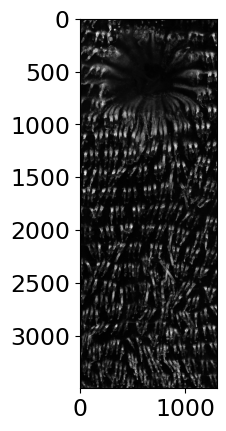

In [188]:
#show image
plt.imshow(img, cmap='gray')

In [189]:
#image shape
(xs,ys) = img.shape
print('image shape: ', img.shape)

image shape:  (3498, 1296)


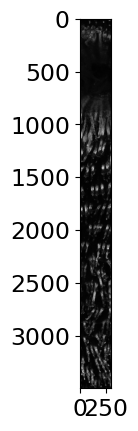

In [190]:
#plot a portion of the image
tr = img[0:xs, 500:800]
xs_p, ys_p = tr.shape
plt.imshow(tr, cmap='gray')


In [191]:
myrange = range(500,800)

In [192]:
# Sum of the pixel intensity for each row (transversely to the follicles)
intensity_sum = 0
sum_list = []
for x in range(0,xs):
    for y in myrange:
        intensity = img[x,y]
        intensity_sum = intensity_sum + intensity
    sum_list.append(intensity_sum)
    intensity_sum = 0

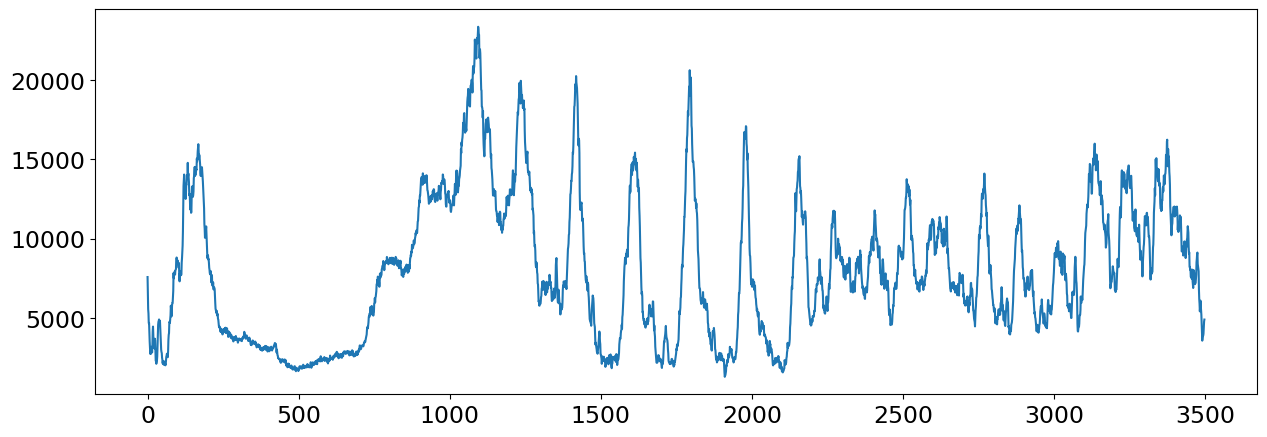

In [193]:
# Plot the sum of intensities
fig = plt.figure(figsize=(15,5))
plt.rc('xtick', labelsize=17)   
plt.rc('ytick', labelsize=17) 
plt.plot(sum_list)

____________________________________________________

In [194]:
def count_long_sequences(vector, min_length, max_distance):
    # Initialize variables
    count = 0
    start_index = None
    end_index = None

    for i, value in enumerate(vector):
        if value == 1:
            if start_index is None:
                start_index = i
            end_index = i
        
        else:
            if start_index is not None and end_index - start_index + 1 >= min_length:
                count += 1
                start_index = None
                end_index = None
            elif start_index is not None and end_index - start_index + 1 < min_length and end_index - start_index + 1 + i - end_index <= max_distance:
                end_index = i
    
    if start_index is not None and end_index - start_index + 1 >= min_length:
        count += 1

    return count

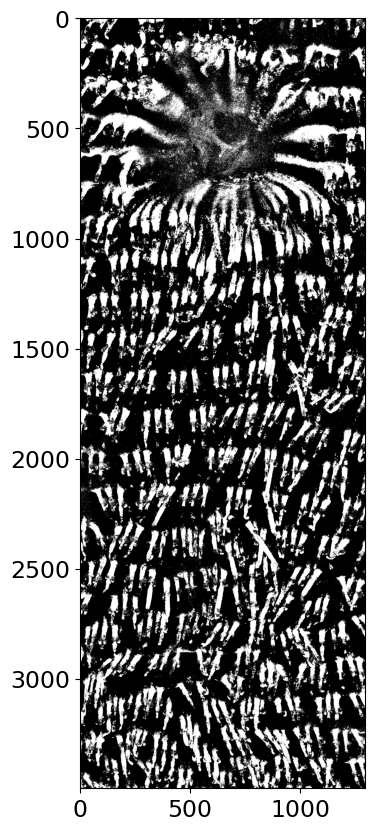

In [195]:
# Thresholding with adaptive gaussian
thresh = cv2.adaptiveThreshold(img, 150, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 501, 0)
plt.figure(figsize=(10, 10))
plt.imshow(thresh, cmap='gray')

In [196]:
# Count the number of pixels that exceed an intensity threshold for each row
count = 0
count_list = []
for x in range(0,xs):
    vector = thresh[x,:]
    # convert to binary
    vector[vector <= 0] = 0
    vector[vector > 0] = 1
    count = count_long_sequences(vector, min_length=20, max_distance=5)
    count_list.append(count)
    count= 0
len(count_list)

3498

In [197]:
# Normalise the intesity sum by the number of brightest pixels for each row
norm_list = []
for i in range(0,xs):
    norm = sum_list[i]/count_list[i]
    norm_list.append(norm)
len(norm_list)

3498

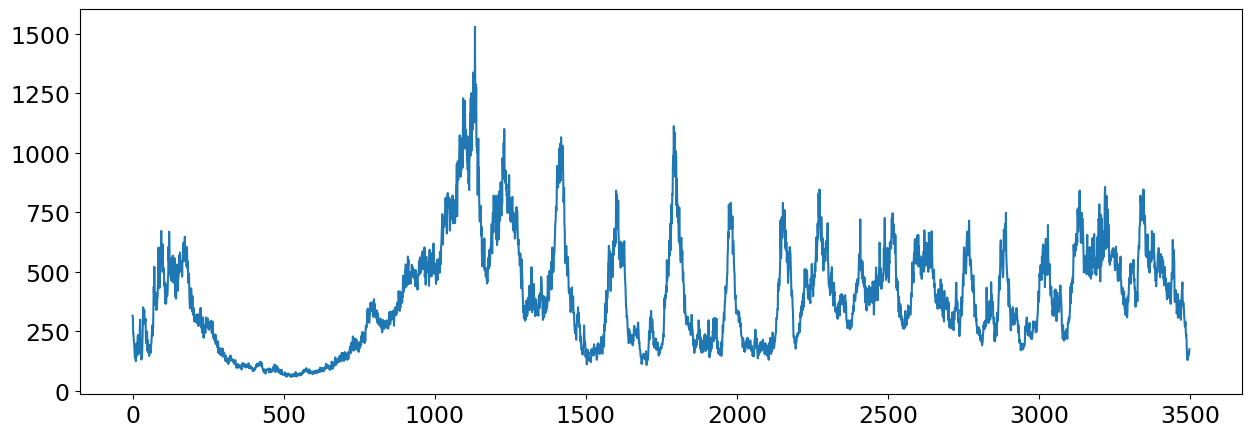

In [198]:
# Plot the normalised sum of intensities
fig = plt.figure(figsize=(15,5))
plt.rc('xtick', labelsize=17)   
plt.rc('ytick', labelsize=17) 
plt.plot(norm_list)